In [64]:
from dateutil.parser import parse
import datetime
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Some exploration on the comments

In [4]:
data = pd.read_csv("../DataRetrieval/1706_dataframe.csv")

In [27]:
vals = list(data.index)

In [31]:
data.comment_date[1]

'2020-02-18T06:11:58Z'

In [90]:
times = []

for i in range(len(vals)):
    try:
        times.append(parse(data.comment_date[i]).strftime('%Y-%m'))
    except:
        pass

In [91]:
timedf = pd.DataFrame(times)

In [92]:
timedf = timedf.rename(columns = {0:'Published Month'})

In [97]:
timedf_cut = timedf[timedf['Published Month'] >= parse('2018-01').strftime('%Y-%m')]

In [41]:
len(times)

291639

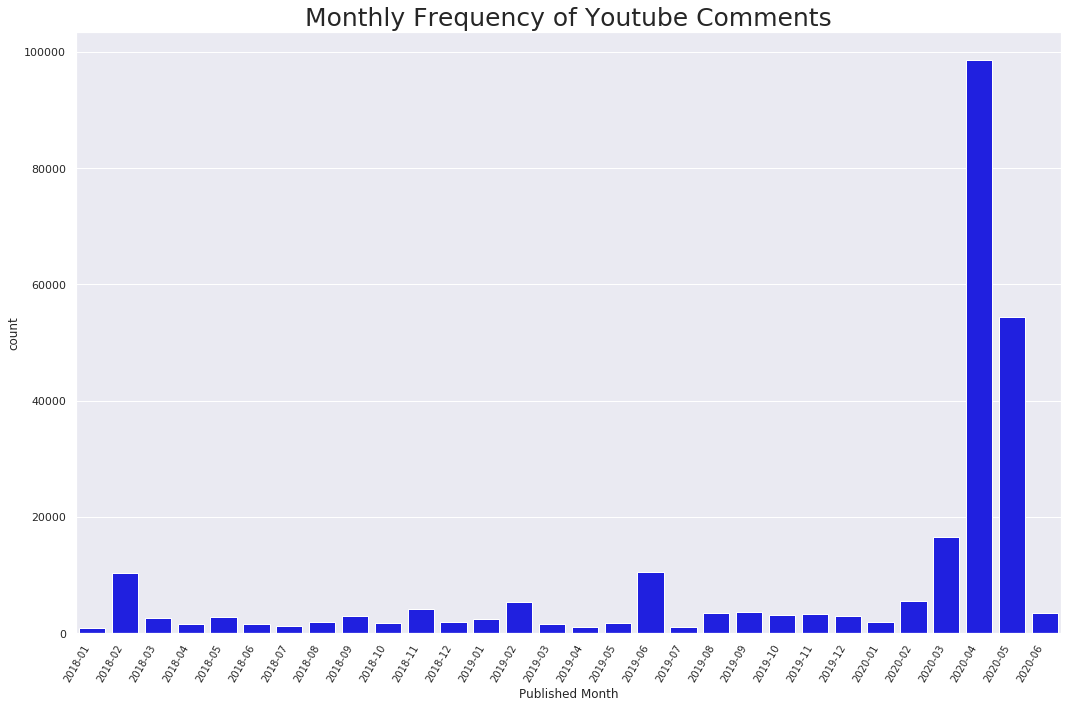

In [98]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Published Month",color = 'blue', data=timedf_cut, order = sorted(set(timedf_cut["Published Month"])))
#make the x labels readable
ax.set_xticklabels(ax.get_xticklabels(minor = True, which = 'both'), rotation=60, ha="right", fontsize = 10)
ax.set_title('Monthly Frequency of Youtube Comments', fontsize = 25)
plt.tight_layout()
plt.show()

### Some exploration on Youtube Videos

In [72]:
vids = pd.read_csv('../DataRetrieval/videos_more_info.csv')

In [99]:
vids = vids.dropna(subset=['Published Month'])

In [100]:
vids_cut = vids[vids['Published Month'] >= parse('2018-01').strftime('%Y-%m')]

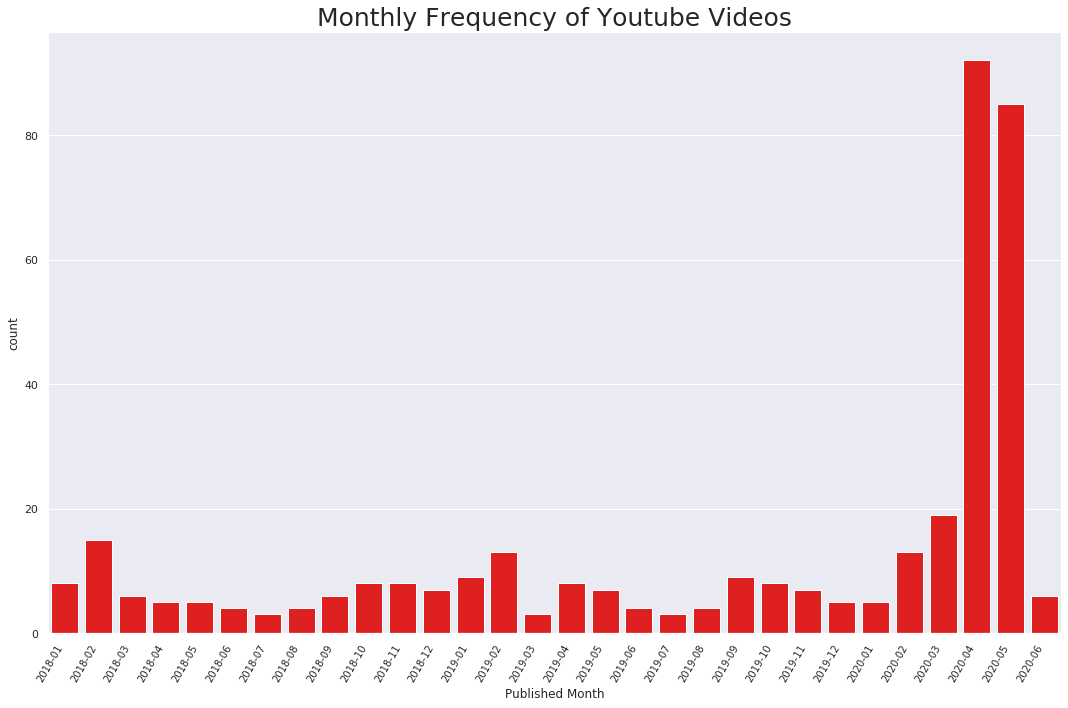

In [102]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Published Month",color = 'red', data=vids_cut, order = sorted(set(vids_cut["Published Month"])))
#make the x labels readable
ax.set_xticklabels(ax.get_xticklabels(minor = True, which = 'both'), rotation=60, ha="right", fontsize = 10)
ax.set_title('Monthly Frequency of Youtube Videos', fontsize = 25)
plt.tight_layout()
plt.show()